In [82]:
import numpy as np
import soundfile as sf
from glob import glob
from matplotlib import pyplot as plt

In [4]:
array_1 = np.load("array_1.npy")
array_2 = np.load("array_2.npy")
n_samples, sample_rate = array_1.shape[0], 44100

In [19]:
for i, shift in enumerate(np.exp(np.linspace(-6, -1, 10))):
    sf.write(f"sound elements/shift/positive_shift_1_{i}.aiff", array_1 + shift, sample_rate)
    sf.write(f"sound elements/shift/negative_shift_1_{i}.aiff", array_1 - shift, sample_rate)
    sf.write(f"sound elements/shift/positive_shift_2_{i}.aiff", array_2 + shift, sample_rate)
    sf.write(f"sound elements/shift/negative_shift_2_{i}.aiff", array_2 - shift, sample_rate)

In [24]:
sf.write("sound elements/reverse_AM.aiff", np.flip(array_1) * array_2, sample_rate)
sf.write("sound elements/inverse_AM_1.aiff", (1 - np.abs(array_1)) * np.sign(array_1) * array_2, sample_rate)
sf.write("sound elements/inverse_AM_2.aiff", (1 - np.abs(array_2)) * np.sign(array_2) * array_1, sample_rate)

In [41]:
sf.write("sound elements/AM/exp_AM_1.aiff", np.power(np.abs(array_1 + 1e-9), array_2) * np.sign(array_1) * 0.03, sample_rate)
sf.write("sound elements/AM/exp_AM_2.aiff", np.power(np.abs(array_2 + 1e-9), array_1) * np.sign(array_2) * 0.03, sample_rate)

In [44]:
paths = glob("sound elements/*.aiff") + glob("sound elements/*/*.aiff")

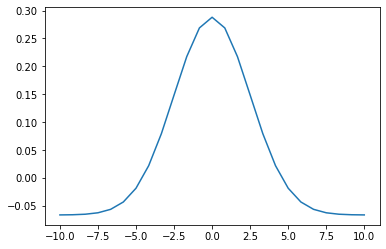

In [113]:
n_stds = 10
std = 2.5
x = np.linspace(-n_stds, n_stds, int(n_stds * std))
weighted_filter = np.exp(-x**2/(2 * std**2)) / (std * np.sqrt(2 * np.pi)) - 3e-2
weighted_filter /= np.sum(weighted_filter)
plt.plot(x, weighted_filter)
plt.show()

In [114]:
for path in paths:
    array, _ = sf.read(path)
    sf.write(
        path[:-5] + f"_filtered.aiff",
             np.array([
                 np.convolve(array[:,0], weighted_filter, mode='valid'),
                 np.convolve(array[:,1], weighted_filter, mode='valid')
             ]).T,
             sample_rate
    )